# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型
#宣告採用序列模型
model = Sequential()
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=128, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=64, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

W1116 21:37:33.609771 27440 deprecation_wrapper.py:119] From C:\Users\Hero3C\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1116 21:37:33.640752 27440 deprecation_wrapper.py:119] From C:\Users\Hero3C\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1116 21:37:33.645749 27440 deprecation_wrapper.py:119] From C:\Users\Hero3C\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W1116 21:37:40.342914 27440 deprecation_wrapper.py:119] From C:\Users\Hero3C\Anaconda3\envs\finlab\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1116 21:37:40.396882 27440 deprecation_wrapper.py:119] From C:\Users\Hero3C\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 289us/step - loss: 0.1070 - acc: 0.9687 - val_loss: 0.0990 - val_acc: 0.9702
Epoch 2/10
48000/48000 [==============================] - 14s 285us/step - loss: 0.0728 - acc: 0.9772 - val_loss: 0.0935 - val_acc: 0.9713
Epoch 3/10
48000/48000 [==============================] - 14s 297us/step - loss: 0.0536 - acc: 0.9835 - val_loss: 0.1041 - val_acc: 0.9705
Epoch 4/10
48000/48000 [==============================] - 14s 283us/step - loss: 0.0423 - acc: 0.9862 - val_loss: 0.0989 - val_acc: 0.9738
Epoch 5/10
48000/48000 [==============================] - 15s 303us/step - loss: 0.0354 - acc: 0.9886 - val_loss: 0.0948 - val_acc: 0.9768
Epoch 6/10
48000/48000 [==============================] - 14s 292us/step - loss: 0.0298 - acc: 0.9900 - val_loss: 0.0942 - val_acc: 0.9748
Epoch 7/10
48000/48000 [==============================] - 13s 280us/step - loss: 0.0250 - acc: 0.9924 - val_loss: 0.

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

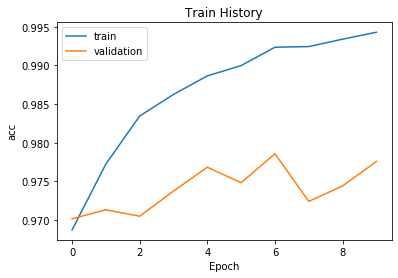

In [14]:
show_train_history(train_history,'acc','val_acc')

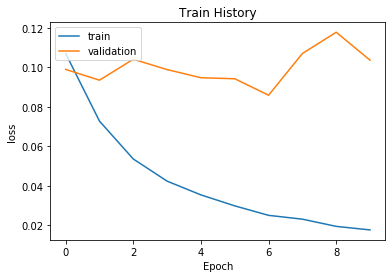

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 87us/step

accuracy= 0.9782
